<a href="https://colab.research.google.com/github/revati2013/Assignment07_Clustering/blob/main/Assign07_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
data=pd.read_csv('EastWestAirlines.csv')

In [ ]:
data.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


#Hierarchical Clustering

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(data.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


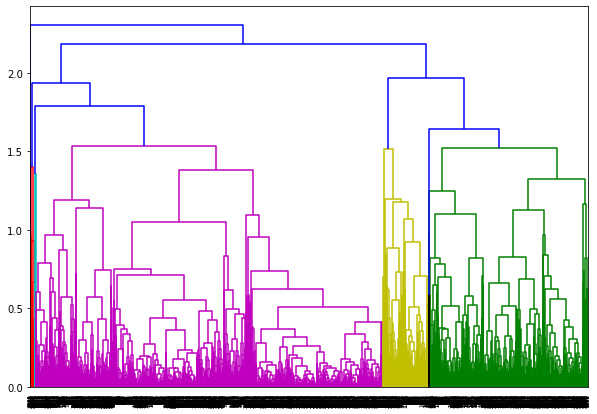

In [ ]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(df_norm,'complete'))

In [ ]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [ ]:
y_hc=hclusters.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 4, 4])

In [ ]:
# Adding clusters to dataset
data['h_clusterid']=hclusters.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


#K-means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_air_df = scaler.fit_transform(data.iloc[:,1:])

In [ ]:
scaled_air_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -5.39219215e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -5.39219215e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -5.39219215e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.25111675e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.59647340e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.59647340e+00]])

In [ ]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

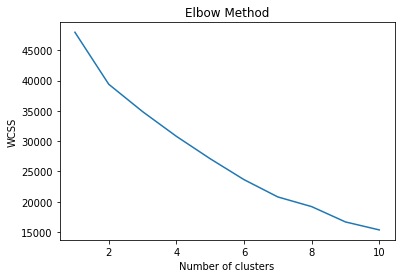

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Build Cluster algorithm using K=4

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=30000)
clusters_new.fit(scaled_air_df)

KMeans(n_clusters=4, random_state=30000)

In [ ]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 3, 3], dtype=int32)

In [ ]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,3


In [ ]:
data[data['clusterid_new']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,4,3
1424,1438,22093,0,3,1,1,14857,11,200,1,2587,0,2,3
2041,2058,15148,0,1,1,1,15148,3,0,0,269,0,4,3
2100,2117,89430,0,3,1,1,24314,18,0,0,1547,0,2,3
2104,2121,49050,0,3,1,1,18436,16,0,0,2426,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,2,3
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,4,3
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,4,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,3


In [ ]:
# Group data by Clusters (K=4)
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1696.904038,53531.870309,105.076960,1.463183,1.023753,1.000475,7103.027553,8.475059,243.730166,0.743468,4714.287411,0.389074,0.741568
1,1,1571.526087,135814.536957,147.916304,4.102174,1.002174,1.052174,48730.434783,19.930435,383.759783,1.155435,4923.378261,0.585870,2.413043
2,2,1706.406897,197291.020690,838.110345,2.241379,1.041379,1.000000,33847.200000,28.737931,5630.227586,16.779310,4774.717241,0.848276,1.551724
3,3,3367.969843,33884.861279,117.633293,1.275030,1.000000,1.000000,4668.905911,7.301568,189.709288,0.521110,1597.951749,0.000000,3.645356


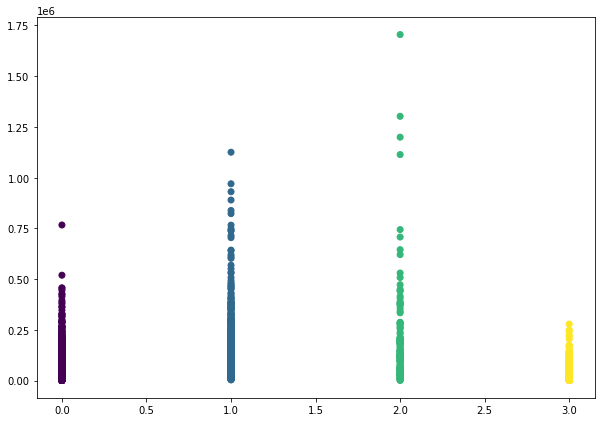

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusterid_new'],data['Balance'], c=clusters_new.labels_) 

Build Cluster algorithm using K=5

In [ ]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(df_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [ ]:
clusters5.labels_

array([4, 4, 4, ..., 1, 0, 0], dtype=int32)

In [ ]:
# Assign clusters to the data set
data2=data.copy()
data2['clusters5id']=clusters5.labels_
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,clusters5id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,3,0


In [ ]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.33066907e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [ ]:
# Group data by Clusters (K=5)
data2.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0,3.081395,2.184109
1,1,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1,1.971535,0.779703
2,2,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1,0.017831,0.230312
3,3,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0,2.000000,1.033981
4,4,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0,1.160138,0.021889


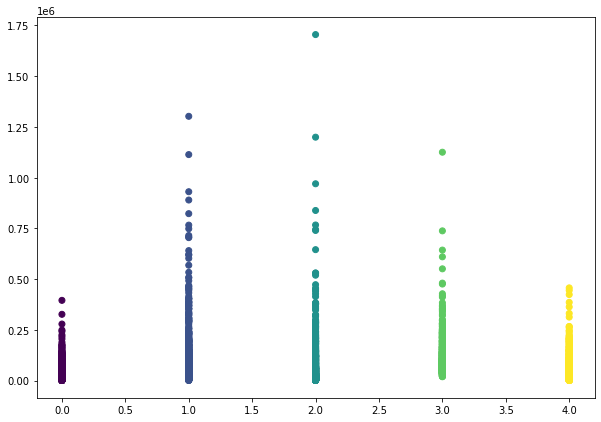

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data2['clusters5id'],data2['Balance'], c=clusters5.labels_) 

#DBSCAN

In [ ]:
array=data.values

In [ ]:
array

array([[    1, 28143,     0, ...,     0,     1,     0],
       [    2, 19244,     0, ...,     0,     1,     0],
       [    3, 41354,     0, ...,     0,     1,     0],
       ...,
       [ 4019, 73597,     0, ...,     1,     0,     0],
       [ 4020, 54899,     0, ...,     0,     4,     3],
       [ 4021,  3016,     0, ...,     0,     4,     3]])

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X


array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -7.85224311e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -7.85224311e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -7.85224311e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -1.25111675e+00, -7.85224311e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.59647340e+00,  1.76287849e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.59647340e+00,  1.76287849e+00]])

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=8)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 5, 5])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,2
3995,2
3996,2
3997,5


In [ ]:
#Adding cluster to dataset
clustered = pd.concat([data,cl],axis=1)

In [ ]:
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,3,5


In [ ]:
clustered[clustered['cluster']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,-1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,2,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0,1,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0,0,-1
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3990,26504,0,2,1,1,10599,29,1000,7,1445,0,2,3,-1
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2,1,-1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0,0,-1
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2,3,-1


In [ ]:
clustered.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1797.860558,163457.438247,752.077025,2.629482,1.066401,1.065073,35794.718459,20.569721,1881.610890,5.435591,4555.555113,0.65073,1.654714,1.073041
1,0,1563.214815,38738.863492,1.058201,1.000000,1.000000,1.000000,2197.723810,5.148148,120.589418,0.414815,4944.928042,0.00000,1.000000,0.000000
2,1,1557.354244,102217.557196,2.083026,3.282288,1.000000,1.000000,26225.359779,15.238007,87.221402,0.250923,4962.007380,0.00000,2.000000,0.523985
3,2,1934.520958,46277.911677,6.943114,1.750000,1.000000,1.000000,10121.420659,9.821856,206.751497,0.673653,4262.767964,1.00000,0.000000,0.002994
4,3,1535.696594,76443.526316,4.643963,4.291022,1.000000,1.000000,46630.216718,18.009288,188.461300,0.597523,4986.356037,1.00000,3.000000,1.000000
5,4,3139.462121,57312.992424,3.787879,2.583333,1.000000,1.000000,15472.378788,13.651515,31.060606,0.113636,1944.545455,0.00000,2.000000,3.000000
6,5,3431.896497,25227.735669,1.963376,1.000000,1.000000,1.000000,2212.130573,5.584395,93.305732,0.340764,1501.632166,0.00000,4.000000,3.000000
7,6,3027.500000,28109.875000,0.000000,1.000000,2.000000,1.000000,7947.750000,12.000000,0.000000,0.000000,2449.250000,0.00000,1.000000,0.000000
